<a href="https://colab.research.google.com/github/shivakumar-2555/ML-practical/blob/main/exp7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.5 MB/s eta 0:00:00


Predicted Cluster: 0
Fuzzy Partition Coefficient (FPC): 0.9541305276918989


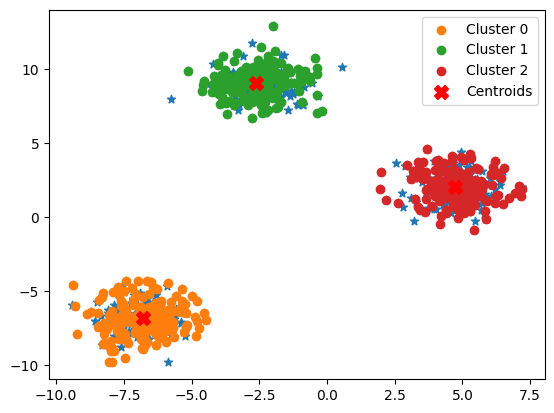

In [2]:
from sklearn.datasets import make_blobs
X, _ = make_blobs( n_features=2, n_samples=800, centers=3, random_state=42 )
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker="*");


#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.33, random_state=125)

#Model Building and Training
#To implement Fuzzy K-Means, we use the skfuzzy library:
import skfuzzy as fuzz

# Number of clusters
n_clusters = 3

# Perform Fuzzy K-Means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_train.T, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None
)

#Predict Output
#To classify new data points, calculate the membership degrees:
# Predict cluster membership for a test point
u_test, _, _, _, _, _ = fuzz.cluster.cmeans_predict(X_test.T, cntr, m=2.0, error=0.005, maxiter=1000)

# Find the most probable cluster for the 6th test point
predicted_cluster = u_test[:, 6].argmax()
print("Predicted Cluster:", predicted_cluster)

#Model Evaluation
#Evaluate the clustering performance using the fuzzy partition coefficient (FPC):
print("Fuzzy Partition Coefficient (FPC):", fpc)

#Visualize the Clusters
# Visualize the clusters and centroids
for j in range(n_clusters):
    plt.scatter(X_train[u[j] > 0.5, 0], X_train[u[j] > 0.5, 1], label=f"Cluster {j}")

plt.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='X', s=100, label="Centroids")
plt.legend()
plt.show()
